In [2]:
import torch
from torch.autograd import Variable
import numpy as np

In [3]:
x = Variable(torch.from_numpy(np.zeros(10)).float(),
             requires_grad=True)

y = Variable(torch.from_numpy(np.ones(10)).float(), 
            requires_grad=True)

In [4]:
# Compute z as a function of x and y.
z = x.dot(y)

In [5]:
# Compute the forward pass.
print(z)

Variable containing:
 0
[torch.FloatTensor of size 1]



In [8]:
print(x.grad)

Variable containing:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 10]



In [7]:
# Compute the backward pass (reverse-mode autodiff)
z.backward()

In [80]:
x.grad

Variable containing:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 10]

In [9]:
# Building logistic regression from scratch. 
m = 784

# parameters
w = Variable(torch.from_numpy(np.zeros(m)).float(), requires_grad=True)
b = Variable(torch.from_numpy(np.zeros(1)).float(), requires_grad=True)

def logistic_regression(x):
    "Write the function like you would in standard method"
    return torch.sigmoid(w.dot(x) + b) 

def negative_likelihood(xs, ys):
    ll = 0
    for n in range(xs.size(0)):
        # Can even have if statements 
    
        if ys[n] == 5:
            ll = ll + torch.log(logistic_regression(xs[n]))
        else:
            ll = ll + torch.log(1 - logistic_regression(xs[n]))
    return -ll

In [10]:
# Load image data.
from data_util import load_mnist
trX, teX, trY, teY = load_mnist(onehot=False)

5


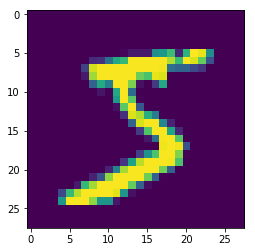

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
print(trY[0])
plt.imshow(trX[0].reshape(28, 28))

In [13]:
xs = Variable(torch.from_numpy(trX[:10]).float(), requires_grad=True)
logistic_regression(xs[0]).data[0]

0.5

In [14]:
ys = torch.from_numpy(trY[:10]).long()
L = negative_likelihood(xs, ys)
print(L)

Variable containing:
 6.9315
[torch.FloatTensor of size 1]



In [15]:
L.backward()

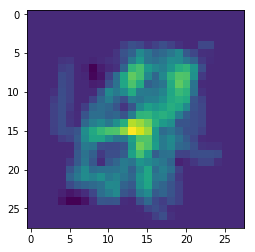

In [16]:
plt.imshow(w.grad.data.numpy().reshape(28, 28))

In [225]:
trX.shape

(60000, 784)

In [17]:
import torch.optim as optim
w.data.zero_()
b.data.zero_()
opt = optim.SGD([w, b], lr=0.1)

for epoch in range(20):
    total = 0
    for i in range(0, 1000, 5):
        # Reset param grads
        opt.zero_grad()

        # Find minibatch
        xs = Variable(torch.from_numpy(trX[i:i+5]).float(), requires_grad=True)
        ys = torch.from_numpy(trY[i:i+5]).long()

        # Compute minibatch likelihood and gradients.
        L = negative_likelihood(xs, ys)
        L.backward()
        #print(xs.grad)
        #print(L.data[0])
        total += L.data[0]
        # Update with a gradient step.
        #print(w.grad.data)
        opt.step()
    print(total)

304.41976741483086
186.578247347079
143.98104433847948
109.42108591646684
87.42873766692355
72.18946863081874
60.8571748311424
49.934328361894586
41.826126895002744
35.904716126919084
31.470956345334343
28.175670119810093
25.52304454682053
23.189465945504708
21.181663327374736
19.47156900009213
17.965678690309687
16.621669217478484
15.43870530051663
14.410063948577772


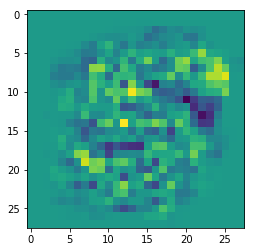

In [18]:
plt.imshow(w.data.numpy().reshape(28, 28))

In [ ]:
# Everything else in pytorch is just fancy extensions beyond the core autograd mechanism

In [ ]:
# The module or blocks approach.
from torch import nn
class Linear(nn.Module):
    def __init__(self, m, n):
        super() 
        self.W = torch.FloatTensor(m, n)
        self.b = torhc.FloatTensor(n)
        self.register_parameter()
        self.register_parameter()

    def forward(self, input):
        return self.W.dot(input) + self.b


layer = Linear(784, 10)
layer.forward(x)